# Aula 11 - Análise Fatorial

*Descobrir e analisar a estrutura de um conjunto de variáveis inter-relacionadas, de modo a construir uma escala de medida para fatores (intrínsecos) que, de alguma forma (mais ou menos explícita), controla as variáveis originais* (MAROCO, 2007).

Busca sintetizar as relações observadas entre um conjunto de variáveis inter-relacionadas.

Representa um conjunto de variáveis originais observadas por um meio de um menor número de fatores intrínsecos.

Objetiva atribuir um escore a constructos (fatores).

Reduz dos dados em fatores.
- As variáveis que compõem um determinado fator devem ser altamente correlacionadas.
- Fator é a combinação linear de variáveis originais.
- Representam dimensões latentes (construtos) que resumem ou explicam o conjunto original de variáveis observadas.

SUPOSIÇÕES:
- **Normalidade (multivariada) e linearidade**: desvios na normalidade e na linearidade podem reduzir as correlações observadas entre as variáveis e prejudicar a solução
- **Matriz de correlações com valores significativos (número substancial de valores superiores a 0,30)**: a matriz de correlações deve apresentar valores altos e significativos para justificar a análise fatorial.
- **Tamanho de amostra**: mínimo de 5 observações por variável, sendo recomendado pelo menos 10 observações por variável analisada.

ANTES DE INICIAR:
- **Verificar viés e outliers**: Afetam a variância, desvio padrão, covariância e correlação.
- **A amostra deve ser igual ou superior a 100 observações**: mínimo de 5 vezes mais observações do que o número de variáveis (recomendável 10 observações por variável).

TIPOS DE ANÁLISES FATORIAIS:
- **Análise exploratória**: o pesquisador tem pouco ou nenhum conhecimento prévio acerca da estrutura de fatores.
- **Análise confirmatória**: caso particular de equações estruturais, já que o pesquisador possui algum conhecimento prévio sobre como as variáveis se comportam e relacionam, assim, assume que a estrutura de fatores é conhecida.

ETAPAS:
1. **Avaliação da adequação da análise**: verificação do cumprimento das suposições necessárias.
2. **Extração dos Fatores**: aplicação de métodos de particionamento da variância como análise de componente principal e análise de fator comum para a extração dos fatores.
3. **Rotação dos Fatores**: busca converter os fatores em fatores não correlacionados com o objetivo de melhorar a interpretação dos mesmos. Existem vários métodos de rotação (varimax, quartimax, promax...).
4. **Interpretação dos Fatores**: 

**ROTAÇÃO**:
Processo que busca facilitar a interpretação da análise fatorial.

Todo tipo de rotação tem um propósito.
Rotações Ortogonais requerem que os fatores não sejam correlacionados. O objetivo da rotação ortogonal é simplicidade e generalização.
Rotações Oblíquas permite que fatores sejam mais correlacionados e busca obter o melhor ajuste aos dados.

REGRAS PARA ROTAÇÃO:
- Interpretação é mais fácil com cargas fatoriais maiores.
- Cada linha em uma matriz de fatores deve conter, no mínimo, um zero.
- Cada coluna deve conter, no mínimo, 'k' zeros.
- cada par de colunas em uma matriz deve conter variáveis cujas cargas fatoriais são altas em uma coluna mas baixas em outra coluna.
- Para situações com quatro ou mais fatores, todo par de colunas deve ter várias variáveis com cargas nulas em pares de colunas específicos.
- Em todo par de colunas, poucas variáveis deve possuir cargas diferentes de zero.

## Exemplo de Análise Fatorial

1. Determine a adequação da utilização de análise fatorial:
- 1.1 Apresente e interprete a Matriz de Correlações de Pearson.
- 1.2 Apresente e interprete os testes de KMO e Bartlett.
- 1.3 ~~Apresente e interprete as matrizes de anti-imagem~~.
2. Determine o número adequado de fatores (extração dos fatores iniciais).
3. Compare os resultados de rotações ortogonais e oblíquas.
3. Denomine os fatores (qual a melhor descrição de cada fator definido?).

### Análise da Matriz de correlações e adequação da análise

Para a Análise Fatorial, precisaremos do módulo FactorAnalyser. 

Para isso, instalaremos a biblioteca e importaremos o módulo.

In [ ]:
# Instalar biblioteca
!pip install factor_analyzer

# Importar Módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer.factor_analyzer import FactorAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 282 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 8.0 MB/s 
     |████████████████████████████████| 98 kB 5.6 MB/s 
     |████████████████████████████████| 8.8 MB 27.7 MB/s 
     |████████████████████████████████| 468 kB 40.1 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=6de5972effabf723787d5bd6c49425c88095c7279aaa7c1e70ce8b8dd0375254
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor-analyzer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar a base de dados 'crime_EUA'
crime = pd.read_excel('/content/drive/MyDrive/!UFSM/Analise_Estatistica/dataset/crime_EUA.xlsx')

In [ ]:
# Inspecionar dados (colunas e contagens)
print(crime.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         50 non-null     object
 1   Violento           50 non-null     int64 
 2   Lesapropriedade    50 non-null     int64 
 3   Assassinato        50 non-null     int64 
 4   Estupro            50 non-null     int64 
 5   Roubo              50 non-null     int64 
 6   Assalto            50 non-null     int64 
 7   Invasão Domicilio  50 non-null     int64 
 8   Furto              50 non-null     int64 
 9   Roubo de carros    50 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 4.0+ KB
None


In [ ]:
# Inspecionar dados (amostra)
print(crime.sample(10)) 

        Unnamed: 0  Violento  Lesapropriedade  Assassinato  Estupro  Roubo  \
47   WEST VIRGINIA       183             2367            7       15     48   
38    RHODE ISLAND       408             5524            4       17    118   
30      NEW MEXICO       615             5364           13       43    127   
39  SOUTH CAROLINA       660             4779           11       37    118   
26        NEBRASKA       224             4080            4       23     82   
10          HAWAII       299             7182            8       34    190   
48       WISCONSIN       182             4616            2       14     70   
27          NEVADA       912             7941           20       67    460   
49         WYOMING       392             4593            6       28     44   
0          ALABAMA       448             4485           13       30    132   

    Assalto  Invasão Domicilio  Furto  Roubo de carros  
47      112                738   1429              199  
38      493               1

In [ ]:
# Matriz de Correlações de Pearson
cor = crime.corr(method='pearson')
cor

,Violento,Lesapropriedade,Assassinato,Estupro,Roubo,Assalto,Invasão Domicilio,Furto,Roubo de carros
Violento,1.000000,0.675840,0.732107,0.735634,0.882653,0.837873,0.820804,0.432233,0.606474
Lesapropriedade,0.675840,1.000000,0.344511,0.720467,0.598461,0.563051,0.874248,0.901569,0.633503
Assassinato,0.732107,0.344511,1.000000,0.671092,0.596073,0.604058,0.575265,0.119201,0.254458
Estupro,0.735634,0.720467,0.671092,1.000000,0.538898,0.638840,0.771475,0.613713,0.416652
Roubo,0.882653,0.598461,0.596073,0.538898,1.000000,0.523039,0.744557,0.326511,0.666654
Assalto,0.837873,0.563051,0.604058,0.638840,0.523039,1.000000,0.675419,0.389666,0.474731
Invasão Domicilio,0.820804,0.874248,0.575265,0.771475,0.744557,0.675419,1.000000,0.659964,0.649253
Furto,0.432233,0.901569,0.119201,0.613713,0.326511,0.389666,0.659964,1.000000,0.376516
Roubo de carros,0.606474,0.633503,0.254458,0.416652,0.666654,0.474731,0.649253,0.376516,1.000000


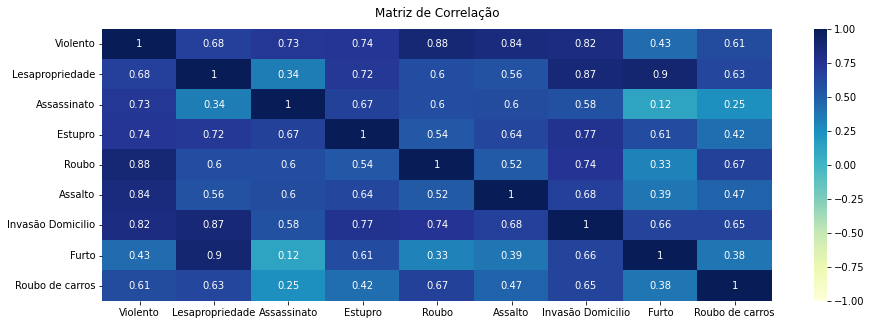

In [ ]:
# Matriz de correlação com mapa de calor.
plt.figure(figsize=(15, 5)) # Tamanho da Figura
heatmap = sns.heatmap(crime.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu') # Mapa de calor com variação da escala, descriminação do valor de correlação e padrão de cores
heatmap.set_title('Matriz de Correlação', fontdict={'fontsize':12}, pad=12) # Título do Gráfico, tamanho de fonte e 
plt.show()

**Matriz de correlações com valores significativos**: Apresenta poucos valores abaixo de .3. A alta correlação entre as variáveis sugere que a análise fatorial é apropriada. 

**Tamanho da amostra é adequado**: há 9 variáveis com 50 observações, ou seja, pelo menos 5 observações por variável.

In [ ]:
# Criar planilha sem a coluna 'O' (dados textuais)
crime_var = crime.drop('Unnamed: 0', axis=1)

In [ ]:
# Inspecionar dados (colunas e contagens)
print(crime_var.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Violento           50 non-null     int64
 1   Lesapropriedade    50 non-null     int64
 2   Assassinato        50 non-null     int64
 3   Estupro            50 non-null     int64
 4   Roubo              50 non-null     int64
 5   Assalto            50 non-null     int64
 6   Invasão Domicilio  50 non-null     int64
 7   Furto              50 non-null     int64
 8   Roubo de carros    50 non-null     int64
dtypes: int64(9)
memory usage: 3.6 KB
None


**TESTE DE ESFERICIDADE DE BARTLETT**

O teste de Esfericidade de Bartlett testa a hipótese da matriz de correlações ser igual a matriz identidade (com determinantes = 1).

Se isso ocorrer, não devemos utilizar análise Fatorial.

H0 = a matriz de correlação é uma matriz identidade.

In [ ]:
# Teste de Esfericidade de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(crime_var)
chi_square_value, p_value

(594.1109771233596, 3.185010988854575e-102)

Nesta situação, o teste permite o uso da análise fatorial, pois apresenta um alto valor de Qui-quadrado (594) com significância estatística ( p < .01). 

Ou seja, pode-se rejeitar a hipótese nula de que a matriz de correlações é uma matriz identidade.

**TESTE KAISER-MEYER-OLKIN (KMO)**

Avalia a adequação da amostra quanto ao grau de correlação parcial entre os valores, que deve ser pequeno.

A estatística KMO, apresenta valores que variam de 0 a 1. 
- KMO abaixo de 0.6 indica que a análise fatorial pode não ser adequada (correlação fraca entre as variáveis)
- Quanto mais próximo de 1, mais adequada é a utilização da técnica.

In [ ]:
# Teste de Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_vars,kmo_model = calculate_kmo(crime_var)
print(kmo_model) # KMO do modelo
print(kmo_vars) # KMO por variável

0.6785009513270187
[0.64626622 0.71645968 0.85549898 0.72930851 0.57333309 0.56450538
 0.84078221 0.62002747 0.64279473]


Valor entre 0.6 e 0.7 indica uma adequação razoável dos dados a este tipo de análise.

**MATRIZ ANTI-IMAGEM**

Apresenta os valores negativos das correlações parciais. 

É uma forma de obter indícios sobre a necessidade de eliminação de determinada variável do modelo.

Produz uma Medida de Adequação da Amostra, ou *Measure of Sampling Adequacy*(MSA), para cada variável (valor, leitura e interpretação similar ao KMO).

Análise:
- Interpretar os valores de MSA para cada variável individualmente e excluir as que se encontram no domínio inaceitável.
- Quanto maiores os valores, melhor.
- Se alguma variável apresentar baixo valor na diagonal principal e alto valor fora dela, talvez haja necessidade de excluí-la.
- Por vezes, a baixa correlação de determinada variável com as demais não necessariamente implica em sua eliminação, podendo representar um fator isoladamente.

In [ ]:
# Matriz de Anti Imagem
# Não necessário, pois o valor 'kmo_vars' acima é a diagonal da matriz que mostra o valor KMO por variável.

### Extração dos fatores iniciais e determinação do número de fatores

Teste inicial, com uma análise fatorial sem rotação para verificar o número de fatores e a carga de cada variável.
Nesta etapa, extrai-se 'eigenvalues' de cada variável e plota-se em um gráfico 'scree'. 

Ao comparar o número de variávies em relação ao 'eigenvalue'. Variáveis com valores 1 ou menor explicam pouca variância do modelo. A análise do gráfico indica o número de fatores que devemos adotar.

In [ ]:
# Análise Fatorial exploratória - extração dos fatores iniciais.
fa = FactorAnalyzer(10, rotation=None)
fa.fit(crime_var)

FactorAnalyzer(n_factors=10, rotation=None, rotation_kwargs={})

In [ ]:
# Apresentar os 'Eigenvalues'
ev, v = fa.get_eigenvalues()
ev

array([5.89720358, 1.2566041 , 0.82067279, 0.43745844, 0.28361903,
       0.15357738, 0.12371103, 0.02058611, 0.00656754])

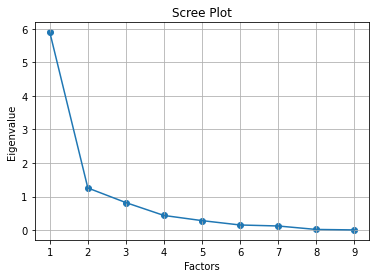

In [ ]:
# Plotar os 'Eigenvalues' em um gráfico 'Scree'
plt.scatter(range(1,crime_var.shape[1]+1), ev)
plt.plot(range(1,crime_var.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**DETERMINAÇÃO DO NÚMERO DE FATORES**

Com base no gráfico, deve-se buscar fazer uma análise com 2 fatores, visto que o terceiro fator já tem um 'eigenvalue' abaixo de '1' (0,82).

Note que isso já era legível, numericamente, na linha anterior, embora o gráfico facilite a leitura.


### Rotação dos Fatores

Análise Fatorial é um método interativo. Sugere-se, de maneira geral, seguir o seguinte processo:

1. Começe com a rotação 'Varimax'
2. O método pode ser: minres, Maximum Likelihood (ml), ou Principal Component (principal). Pode-se começar com 'minres' + 'Varimax'
3. Mude para 'Maximum Likelihood' + 'varimax'
4. Há duas opções lógicas para (não) usar 'squared multiple correlation' como ponto de partida para estimar os fatores. Pode-se começar adotando 'smc' (use_smc=True) e depois tentar 'maximum absolute correlation'.
5. Compare os modelos e mantenha os melhores.
6. Analise as cargas fatoriais e considere testar um modelo com +1 ou -1 fator.

In [ ]:
# Criação de um modelo de Análise Fatorial com rotação Ortogonal: Varimax + minres (use_smc=True)
fa_1 = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa_1.fit(crime_var)

fa_1.loadings_

array([[0.94450283, 0.34322559],
       [0.38732507, 0.93044805],
       [0.79426379, 0.04736957],
       [0.62473142, 0.51774513],
       [0.75732166, 0.31384548],
       [0.7059744 , 0.32344926],
       [0.67595402, 0.65704505],
       [0.10175082, 0.92241366],
       [0.47376259, 0.43474544]])

In [ ]:
# Comunalidade (índice de variabilidade total explicada por todos os fatores para cada variável)
fa_1.get_communalities()

array([1.00988939, 1.01575428, 0.63309884, 0.65834937, 0.67203509,
       0.60301928, 0.88862203, 0.86120018, 0.41345459])

Neste Caso, violento (100%), Lesapropriedade (100%), assassinanato (63%)....

In [ ]:
# Verificar a variância explicada por cada fator
df_fa1 = fa_1.get_factor_variance()

var_factor = pd.DataFrame(df_fa1, columns=['Fator 1', 'Fator 2'], index=['Variância (SS)', 'Variância Proporcional', 'Variância Cumulativa'])
print(var_factor)

                         Fator 1   Fator 2
Variância (SS)          3.826905  2.928518
Variância Proporcional  0.425212  0.325391
Variância Cumulativa    0.425212  0.750603


No exemplo acima, os dois fatores, juntos, explicam **75% da variância dos dados**.

In [ ]:
# Criação de um modelo de Análise Fatorial com rotação Obliqua: Varimax + Maximum Likelihood (use_smc=True)
fa_2 = FactorAnalyzer(2, rotation="oblimin", method='ml', use_smc=True)
fa_2.fit(crime_var)

fa_2.loadings_

array([[ 0.97036955,  0.04952229],
       [ 0.17050252,  0.89657743],
       [ 0.85391029, -0.20922258],
       [ 0.51439848,  0.39479265],
       [ 0.85902827,  0.04195249],
       [ 0.81363554,  0.03904017],
       [ 0.51668578,  0.54519754],
       [-0.13447846,  1.00019455],
       [ 0.39780625,  0.37559998]])

In [ ]:
# Criação de um modelo de Análise Fatorial com rotação Oblíuqa - Rotação oblimin, método minres, use_smc=True
fa_3 = FactorAnalyzer(2, rotation="oblimin", method='minres', use_smc=True)
fa_3.fit(crime_var)

fa_3.loadings_


array([[ 0.99051872,  0.027467  ],
       [ 0.20917878,  0.8840928 ],
       [ 0.89315062, -0.24356001],
       [ 0.58263764,  0.33949456],
       [ 0.78457804,  0.06473149],
       [ 0.72367799,  0.09447654],
       [ 0.60624658,  0.47437487],
       [-0.11419447,  0.98160807],
       [ 0.43133381,  0.30400336]])

### Interpretação dos fatores

1. Denomine os fatores (qual a melhor descrição de cada fator definido?).

In [ ]:
# Plot da matrix de cargas dos fatores com nome nas variáveis [MODELO 1]
loadings = pd.DataFrame(fa_1.loadings_, columns=['Fator 1', 'Fator 2'], index=crime_var.columns)
loadings['Contribui F1'] = ['Sim' if var > 0.5 else '' for var in loadings['Fator 1']]
loadings['Contribui F2'] = ['Sim' if var > 0.5 else '' for var in loadings['Fator 2']]

print('Cargas Fatoriais \n%s' %loadings)

Cargas Fatoriais 
                    Fator 1   Fator 2 Contribui F1 Contribui F2
Violento           0.944503  0.343226          Sim             
Lesapropriedade    0.387325  0.930448                       Sim
Assassinato        0.794264  0.047370          Sim             
Estupro            0.624731  0.517745          Sim          Sim
Roubo              0.757322  0.313845          Sim             
Assalto            0.705974  0.323449          Sim             
Invasão Domicilio  0.675954  0.657045          Sim          Sim
Furto              0.101751  0.922414                       Sim
Roubo de carros    0.473763  0.434745                          


In [ ]:
# Plot da matrix de cargas dos fatores com nome nas variáveis [MODELO 3]
loadings = pd.DataFrame(fa_3.loadings_, columns=['Fator 1', 'Fator 2'], index=crime_var.columns)
loadings['Contribui F1'] = ['Sim' if var > 0.5 else '' for var in loadings['Fator 1']]
loadings['Contribui F2'] = ['Sim' if var > 0.5 else '' for var in loadings['Fator 2']]

print('Cargas Fatoriais \n%s' %loadings)

Cargas Fatoriais 
                    Fator 1   Fator 2 Contribui F1 Contribui F2
Violento           0.990519  0.027467          Sim             
Lesapropriedade    0.209179  0.884093                       Sim
Assassinato        0.893151 -0.243560          Sim             
Estupro            0.582638  0.339495          Sim             
Roubo              0.784578  0.064731          Sim             
Assalto            0.723678  0.094477          Sim             
Invasão Domicilio  0.606247  0.474375          Sim             
Furto             -0.114194  0.981608                       Sim
Roubo de carros    0.431334  0.304003                          


Fator 1: violento, assassinato, estupro, roubo, assalto, invasão domicílio, roubo de carros

Fator 2: lesapropriedade, furto, invasão a domicílio.

NOMECLATURA: 
- Fator 1 = crimes com presença de vítimas. / Crimes
- Fator 2 = crimes sem a presença de vítimas. / Furtos

# Atividade

Utilizando os mesmos dados apresentados em sala, **faça um modelo com 3 fatores**.

1. Determine a adequação da utilização de análise fatorial:
- 1.1 Apresente e interprete a Matriz de Correlações de Pearson.
- 1.2 Apresente e interprete os testes de KMO e Bartlett.

2. Determine o número adequado de fatores (extração dos fatores iniciais).
3. Teste modelos com rotações ortogonais e obliquas, e os métodos ml e principal.
3. Denomine os fatores (qual a melhor descrição de cada fator definido?).

In [ ]:
# Matriz de Correlações de Pearson
cor2 = crime.corr(method='pearson')
cor2

,Violento,Lesapropriedade,Assassinato,Estupro,Roubo,Assalto,Invasão Domicilio,Furto,Roubo de carros
Violento,1.000000,0.675840,0.732107,0.735634,0.882653,0.837873,0.820804,0.432233,0.606474
Lesapropriedade,0.675840,1.000000,0.344511,0.720467,0.598461,0.563051,0.874248,0.901569,0.633503
Assassinato,0.732107,0.344511,1.000000,0.671092,0.596073,0.604058,0.575265,0.119201,0.254458
Estupro,0.735634,0.720467,0.671092,1.000000,0.538898,0.638840,0.771475,0.613713,0.416652
Roubo,0.882653,0.598461,0.596073,0.538898,1.000000,0.523039,0.744557,0.326511,0.666654
Assalto,0.837873,0.563051,0.604058,0.638840,0.523039,1.000000,0.675419,0.389666,0.474731
Invasão Domicilio,0.820804,0.874248,0.575265,0.771475,0.744557,0.675419,1.000000,0.659964,0.649253
Furto,0.432233,0.901569,0.119201,0.613713,0.326511,0.389666,0.659964,1.000000,0.376516
Roubo de carros,0.606474,0.633503,0.254458,0.416652,0.666654,0.474731,0.649253,0.376516,1.000000


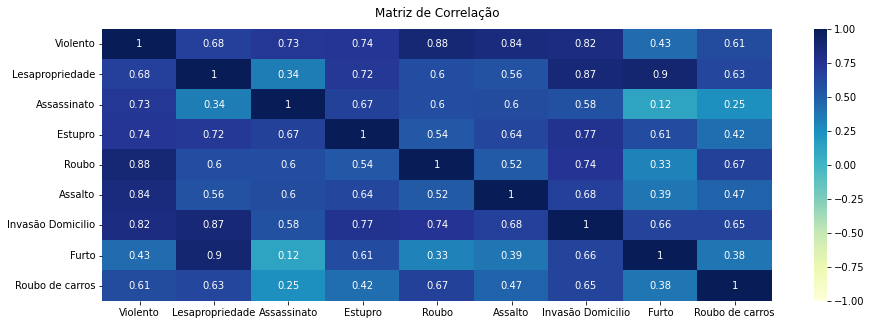

In [ ]:
# Matriz de correlação com mapa de calor.
plt.figure(figsize=(15, 5)) # Tamanho da Figura
heatmap = sns.heatmap(crime.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu') # Mapa de calor com variação da escala, descriminação do valor de correlação e padrão de cores
heatmap.set_title('Matriz de Correlação', fontdict={'fontsize':12}, pad=12) # Título do Gráfico, tamanho de fonte e 
plt.show()

**Análise:**

In [ ]:
# Teste de Esfericidade de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(crime_var)
chi_square_value, p_value

(594.1109771233596, 3.185010988854575e-102)

In [ ]:
# Teste de Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_vars,kmo_model = calculate_kmo(crime_var)
print(kmo_model) # KMO do modelo
print(kmo_vars) # KMO por variável

0.6785009513270187
[0.64626622 0.71645968 0.85549898 0.72930851 0.57333309 0.56450538
 0.84078221 0.62002747 0.64279473]


**Análise:**

In [ ]:
# Análise Fatorial exploratória - extração dos fatores iniciais.
fe = FactorAnalyzer(10, rotation=None)
fe.fit(crime_var)

FactorAnalyzer(n_factors=10, rotation=None, rotation_kwargs={})

In [ ]:
# Apresentar os 'Eigenvalues'
ev, v = fe.get_eigenvalues()
ev

array([5.89720358, 1.2566041 , 0.82067279, 0.43745844, 0.28361903,
       0.15357738, 0.12371103, 0.02058611, 0.00656754])

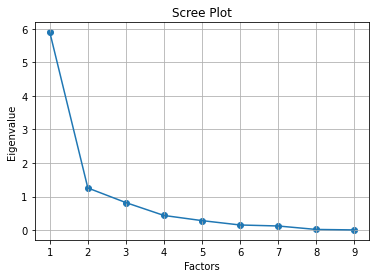

In [ ]:
# Plotar os 'Eigenvalues' em um gráfico 'Scree'
plt.scatter(range(1,crime_var.shape[1]+1), ev)
plt.plot(range(1,crime_var.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Criação de um modelo de Análise Fatorial com rotação Ortogonal: Varimax + minres (use_smc=True)
fe_1 = FactorAnalyzer(3, rotation="varimax", method='ml', use_smc=True)
fe_1.fit(crime_var)

fe_1.loadings_

array([[0.30293447, 0.72211917, 0.61812168],
       [0.8969854 , 0.25896197, 0.35139796],
       [0.04135281, 0.65779821, 0.39077992],
       [0.54210646, 0.56981552, 0.24938631],
       [0.20833682, 0.35759706, 0.90767901],
       [0.30752632, 0.89702477, 0.15385499],
       [0.64992745, 0.44138396, 0.49707333],
       [0.93035981, 0.11884911, 0.0998793 ],
       [0.42646441, 0.19602152, 0.55549036]])

In [ ]:
# Plot da matrix de cargas dos fatores com nome nas variáveis
loadings = pd.DataFrame(fe_1.loadings_, columns=['Fator 1', 'Fator 2', 'Fator 3'], index=crime_var.columns)
loadings['In F1'] = ['Sim' if var > 0.5 else '' for var in loadings['Fator 1']]
loadings['In F2'] = ['Sim' if var > 0.5 else '' for var in loadings['Fator 2']]
loadings['In F3'] = ['Sim' if var > 0.5 else '' for var in loadings['Fator 3']]
print('Cargas Fatoriais \n%s' %loadings)

Cargas Fatoriais 
                    Fator 1   Fator 2   Fator 3 In F1 In F2 In F3
Violento           0.302934  0.722119  0.618122         Sim   Sim
Lesapropriedade    0.896985  0.258962  0.351398   Sim            
Assassinato        0.041353  0.657798  0.390780         Sim      
Estupro            0.542106  0.569816  0.249386   Sim   Sim      
Roubo              0.208337  0.357597  0.907679               Sim
Assalto            0.307526  0.897025  0.153855         Sim      
Invasão Domicilio  0.649927  0.441384  0.497073   Sim            
Furto              0.930360  0.118849  0.099879   Sim            
Roubo de carros    0.426464  0.196022  0.555490               Sim


In [ ]:
# Comunalidade (índice de variabilidade total explicada por todos os fatores para cada variável)
fe_1.get_communalities()

array([0.9952998 , 0.99512463, 0.58711749, 0.68076267, 0.99516108,
       0.92289724, 0.86430738, 0.88967036, 0.52886587])

In [ ]:
# Verificar a variância explicada por cada fator
df_fe1 = fe_1.get_factor_variance()

var_factor = pd.DataFrame(df_fe1, columns=['Fator 1', 'Fator 2', 'Fator 3'], index=['Variância (SS)', 'Variância Proporcional', 'Variância Cumulativa'])
print(var_factor)

                         Fator 1   Fator 2   Fator 3
Variância (SS)          2.799765  2.525804  2.133637
Variância Proporcional  0.311085  0.280645  0.237071
Variância Cumulativa    0.311085  0.591730  0.828801


**ANÁLISE**

# Referências:

[Análise Fatorial - DATASKLR](https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis)

[Introduction to Factor Analysis in Python](https://www.datacamp.com/tutorial/introduction-factor-analysis)

[Factor Analyzer](https://factor-analyzer.readthedocs.io/en/latest/index.html)

[NumPy User Guide](https://numpy.org/doc/stable/user/index.html)

[Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)

[Seaborn User Guide](https://seaborn.pydata.org/index.html)


[Decomposing signals in components (matrix factorization problems)](https://scikit-learn.org/stable/modules/decomposition.html?highlight=factor)

https://pypi.org/project/factor-analyzer/

https://github.com/Sarmentor/KMO-Bartlett-Tests-Python



